### Regression - эффективность расхода топлива


В этом задании используется классический датасет Auto MPG. Необходимо построить модель, предсказывающую эффективность расхода топлива автомобилей конца 70-х и начала 80-х. В датасете представлено описание множества различных автомобилей того времени. В нём содержатся такие параметры как количество цилиндров, лошадиных сил, объем двигателя и вес.



Описание данных

* mpg - расход топлива
* cylinders - количество цилиндров
* displacement - смещение
* horsepower - лошадиные силы
* weight - вес
* acceleration - ускорение
* model year - год выпуска
* origin - страна (1 - USA, 2 - Europe, 3 - Japan)
* car name - наименование автомобиля

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
# !gdown https://drive.google.com/uc?id=1_MfiAd6ZPYmgvRqTY61EQL5Nl2LtfoOM

In [335]:
data = pd.read_csv('auto-mpg.csv')

In [336]:
data.shape

(398, 9)

In [337]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [338]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### Задание 1

Проведите анализ и визуализацию данных. А также реализуйте предварительную обработку данных - добавьте признак AGE возраст автомобиля (в предположении, что анализ проводится в 1985 году), а также удалите категориальные признаки.

### Решение

Добавляем признак AGE и удаляем признак MODEL YEAR

In [339]:
data['age'] = 85 - data['model year']
data = data.drop('model year', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   age           398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Также удалим название марок авто, предварительно сохранив их отдельно.

In [340]:
car_names = data['car name']
data = data.drop('car name', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
 7   age           398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


Удалим записи с отсутствующим значением HORSEPOWER и приведем тип столбца к int64

In [341]:
data = data.drop(data[data['horsepower'] == '?'].index)
data['horsepower'] = pd.to_numeric(data['horsepower'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   origin        392 non-null    int64  
 7   age           392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


Превращаем мили/галлон в литры/100 км

In [342]:
koef = 3.785411784 / 1.609344 * 100
print(koef)
data['mpg'] = koef / data['mpg'] 

235.2145833333333


Создадим удобные переменные

In [343]:
x = data.loc[:, data.columns != 'mpg'].to_numpy()
y = data['mpg'].values
feature_names = data.columns[1:]

Построим графики

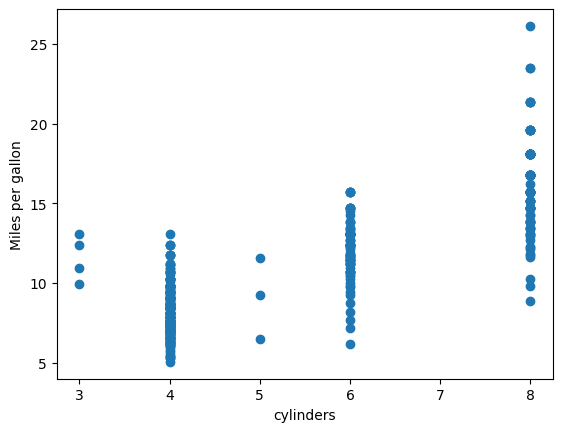

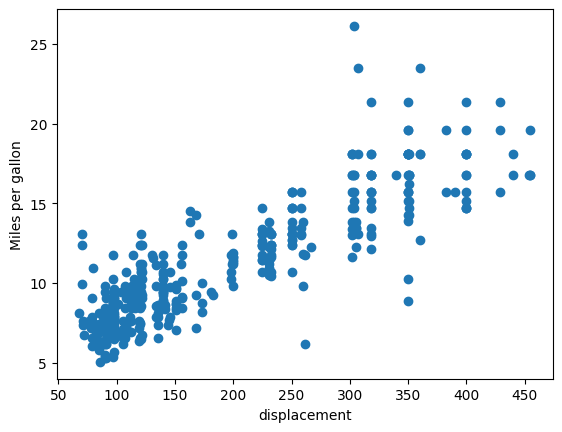

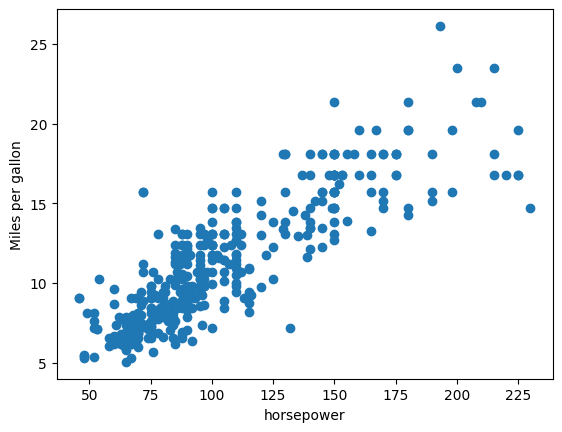

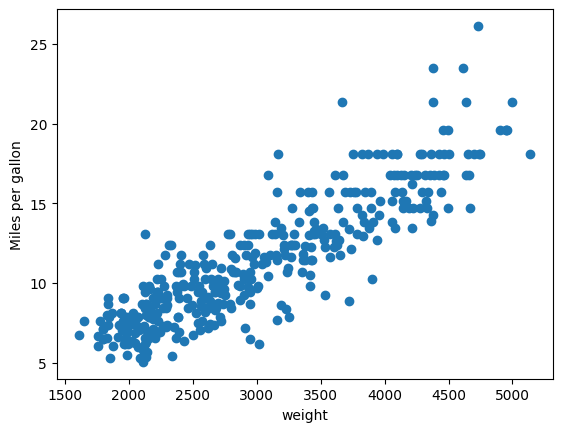

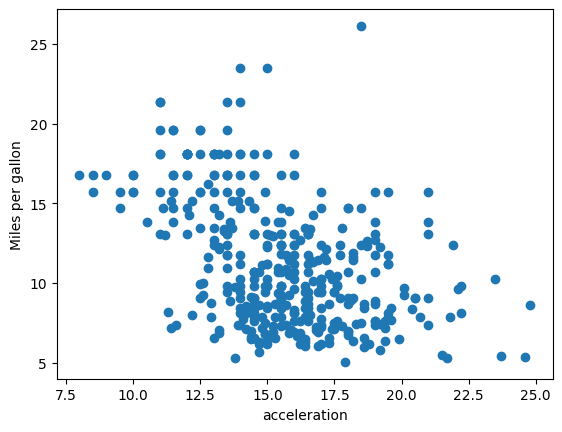

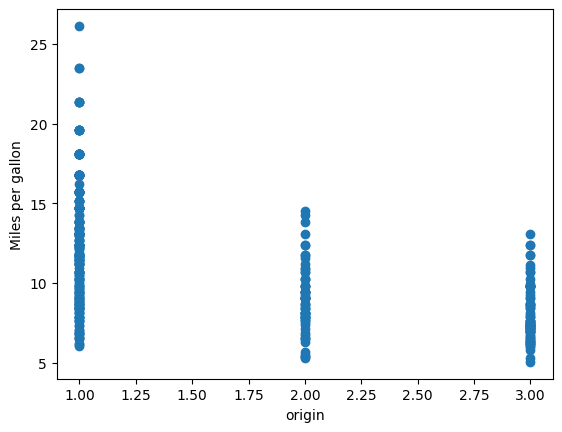

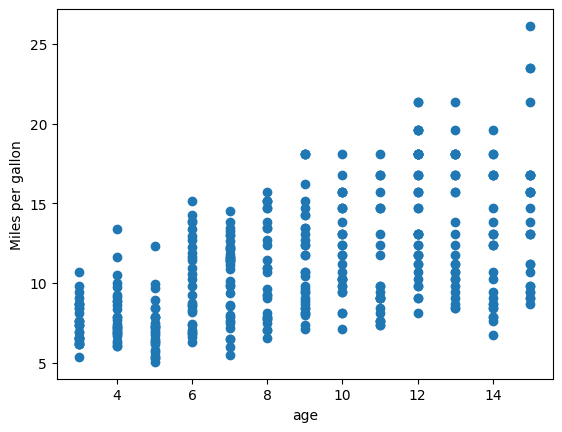

In [344]:
for index, feature_name in enumerate(feature_names):
    plt.figure()
    plt.scatter(x[:, index], y)
    plt.ylabel('Miles per gallon')
    plt.xlabel(feature_name)

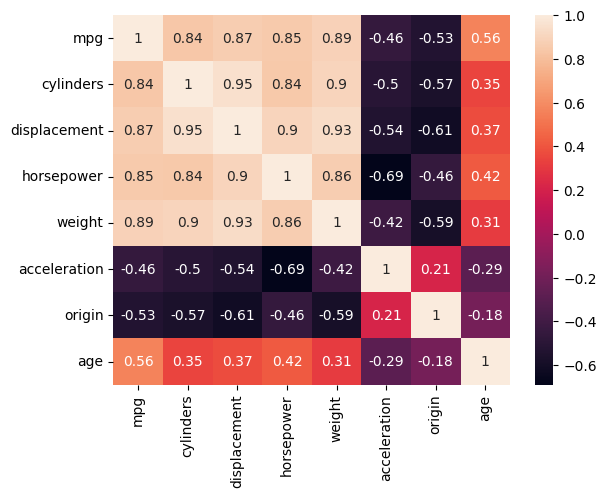

In [345]:
hm = sns.heatmap(data.corr(), annot=True)

In [346]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
mpg,1.000000,0.839385,0.866050,0.854809,0.885056,-0.456338,-0.532932,0.558255
cylinders,0.839385,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.568932,0.345647
displacement,0.866050,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.614535,0.369855
horsepower,0.854809,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.455171,0.416361
weight,0.885056,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.585005,0.309120
acceleration,-0.456338,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.212746,-0.290316
origin,-0.532932,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,1.000000,-0.181528
age,0.558255,0.345647,0.369855,0.416361,0.309120,-0.290316,-0.181528,1.000000


Имеем высокую отрицательную корреляцию mpg с weight и displacement

### Задание 2

Реализуйте линейную регрессию - зависимость расхода топлива от мощности двигателя (количество лошадиных сил). Какая линейная зависимость получилась? Проведите анализ.

Импортируем регрессию

In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Генерируем данные для X и Y

In [348]:
Xhp = data[['horsepower']].values
y = data['mpg'].values

Обучаем и предсказываем

In [349]:
lr = LinearRegression()
lr.fit(Xhp, y)

y_pred = lr.predict(Xhp)

print('Slope: {:.2f}'.format(lr.coef_[0]))
print('Intercept: {:.2f}'.format(lr.intercept_))

Slope: 0.09
Intercept: 2.17


In [350]:
y_pred.argmax()

115

Получили y = -0.16x + 39.94

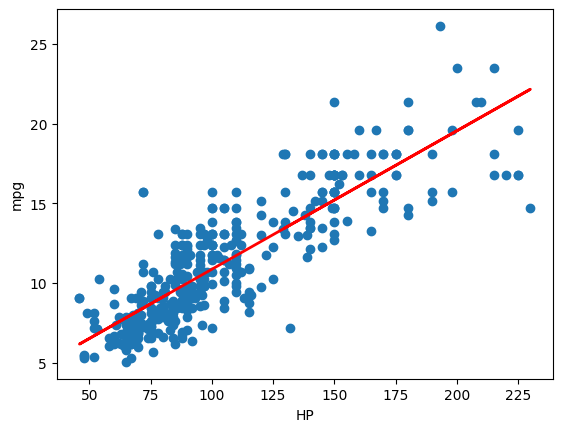

In [351]:
plt.scatter(Xhp, y)
plt.xlabel('HP')
plt.ylabel('mpg')
plt.plot(Xhp, y_pred, color='red', linewidth=2)

In [352]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse) 
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')

MSE: 4.115
RMSE: 2.028


In [353]:
r2 = lr.score(Xhp, y)
print(r2)

0.7306976406434582


### Задание 3

Реализуйте множественную регрессию, при этом необходимо провести масштабирование признаков.

In [354]:
#здесь ваш код

### Задание 4
Выполните регуляризацию модели разными способами и оцените её качество. 

In [355]:
#здесь ваш код

### Задание 5

Проведите оценку и сравнительный анализ результатов. Какие признаки являются значимыми?

In [ ]:
#здесь ваш код